<a href="https://colab.research.google.com/github/Dhaarani13/neural_network/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3779 - val_loss: 0.2806
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2478 - val_loss: 0.1359
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0949 - val_loss: 0.0312
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0194 - val_loss: 0.0240
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193 - val_loss: 0.0144
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139 - val_loss: 0.0128
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0123 - val_loss: 0.0227
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0117
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.4796 - val_loss: 0.3924
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.3664 - val_los

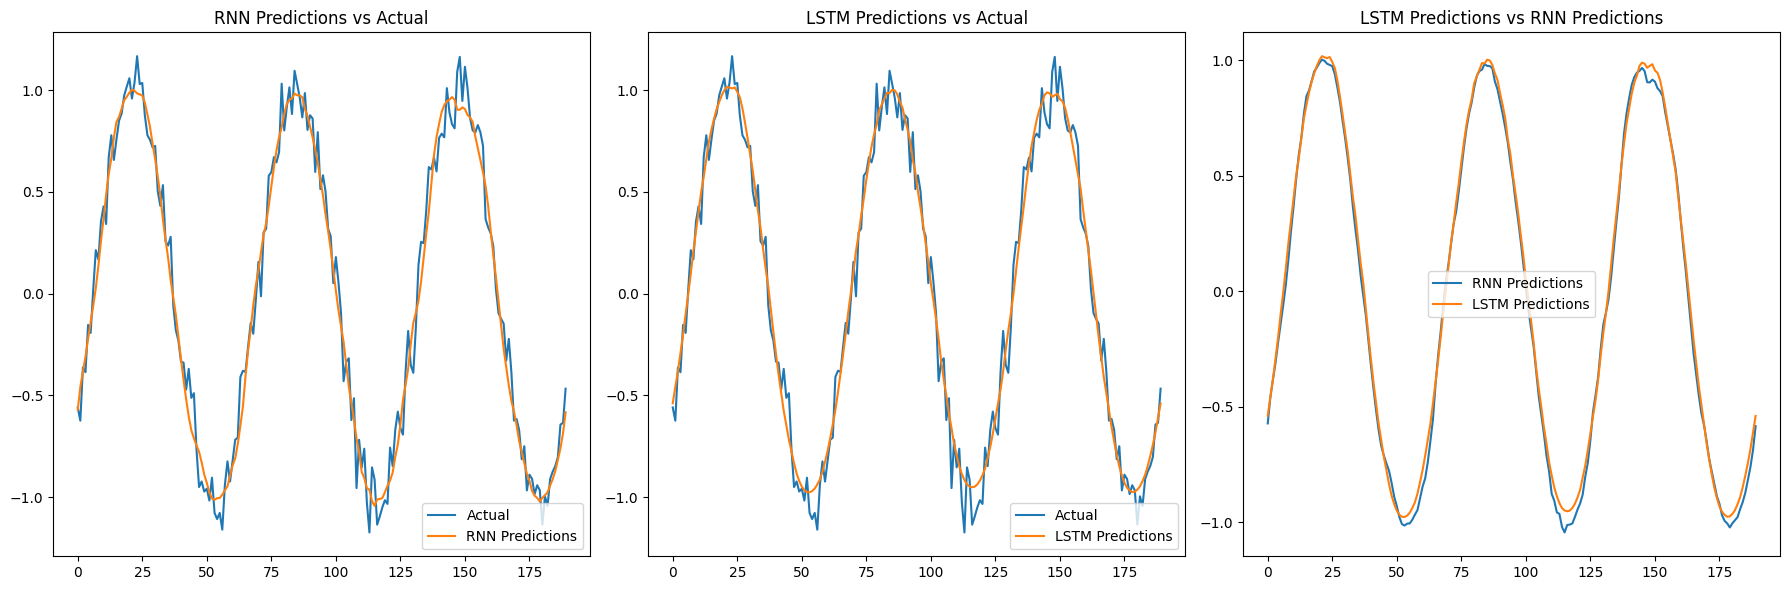

RNN Model Loss: 0.011697902344167233
LSTM Model Loss: 0.01013396680355072


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Generate synthetic time series data (sine wave)
def generate_data(n_samples=1000, time_steps=50):
    x = np.linspace(0, 100, n_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, n_samples)

    # Prepare the data for sequence learning
    data = []
    labels = []
    for i in range(len(y) - time_steps):
        data.append(y[i:i+time_steps])
        labels.append(y[i+time_steps])

    return np.array(data), np.array(labels)

# Data Preprocessing
time_steps = 50
X, y = generate_data(n_samples=1000, time_steps=time_steps)

# Scale data to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Reshape for LSTM and RNN models (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and compile RNN model
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

# Build and compile LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mse')
    return model

# Train RNN model
rnn_model = build_rnn_model((time_steps, 1))
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Train LSTM model
lstm_model = build_lstm_model((time_steps, 1))
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using both models
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

# Visualize the results
plt.figure(figsize=(18, 6))

# Plot the actual vs predicted values for RNN
plt.subplot(1, 3, 1)
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='RNN Predictions')
plt.title("RNN Predictions vs Actual")
plt.legend()

# Plot the actual vs predicted values for LSTM
plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title("LSTM Predictions vs Actual")
plt.legend()

# Plot the actual vs predicted values for LSTM
plt.subplot(1, 3, 3)
plt.plot(rnn_predictions, label='RNN Predictions')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title("LSTM Predictions vs RNN Predictions")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate both models
rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"RNN Model Loss: {rnn_loss}")
print(f"LSTM Model Loss: {lstm_loss}")
